# Meningkatkan Pendapatan Perusahaan

Tim pemasaran di sebuah toko daring besar ingin meningkatkan pendapatan. Sebagai seorang analis, kita akan bekerja sama dengan tim pemasaran tersebut untuk menyusun daftar hipotesis dan menjalankan testing serta menganalisis hasilnya supaya kita dapat membantu meningkatkan pendapatan perusahaan.

Data yang kita miliki saat ini terbagi dalam 3 dataset, 1 dataset mengenai hipotesis akan digunakan dalam bagian pertama proyek, sedangkan 2 data lainnya mengenai jumlah kunjungan dan pendapatan dari pengguna akan digunakan dalam bagian selanjutnya.

**KONTEN**

* [Pendahuluan]
* [Tahap 1. Eksplorasi Data]
    * [1.1 Inisialisasi]
    * [1.2 Memuat Data]
    * [1.3 Mempersiapkan Data]
    * [1.4 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 2. Pra-pemrosesan Data]   
    * [2.1 Data Hipotesis]
        * [2.1.1 Memperbaiki Gaya Penulisan]
    * [2.2 Data Pesanan]
        * [2.2.1 Memperbaiki Gaya Penulisan]
        * [2.2.2 Memperbaiki Tipe Data]
    * [2.3 Data Kunjungan]
        * [2.3.1 Memperbaiki Gaya Penulisan]
        * [2.3.2 Memperbaiki Tipe Data]
    * [2.4 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 3. Memprioritaskan Hipotesis]
    * [3.1 Framework ICE]
    * [3.2 Framework RICE]
    * [3.3 Kesimpulan dan Langkah Selanjutnya]
* [Tahap 4. Analisa Data A/B Testing]
    * [4.1 Pendapatan Kumulatif Berdasarkan Kelompok]
    * [4.2 Ukuran Pesanan Rata-rata Kumulatif Berdasarkan Kelompok]
    * [4.3 Perbedaan Relatif Ukuran Pesanan Rata-rata Kumulatif]
    * [4.4 Tingkat Konversi Setiap Kelompok]
    * [4.5 Jumlah Pesanan per Pengguna]
    * [4.6 Harga Pesanan]
    * [4.7 Signifikansi Statistik]
        * [4.7.1 Perbedaan Konversi Antar Kelompok]
        * [4.7.2 Perbedaan Ukuran Pesanan Rata-rata Antar Kelompok]
        * [4.7.3 Perbedaan Konversi Antar Kelompok Menggunakan Data yang Telah Difilter]
        * [4.7.4 Perbedaan Ukuran Pesanan Rata-rata Antar Kelompok Menggunakan Data yang Telah Difilter]
    * [4.8 Kesimpulan Analisa A/B testing]   
* [Kesimpulan Umum]

## Pendahuluan

Dalam proyek kali ini, kita akan mempelajari dan menganalisis data mengenai pemesanan, pendapatan dan data kunjungan kelompok uji, serta memprioritaskan hipotesis dan melakukan analisis pengujian yang tepat untuk meningkatkan pendapatan sebuah toko daring. 

### Tujuan:
Menentukan hipotesis dan mengambil keputusan berdasarkan data apakah hipotesis tersebut dapat dijalankan untuk membantu meningkatkan pendapatan perusahaan dengan melakukan analisa pengujian kelompok A/B.

### Tahapan
Kumpulan data yang kita miliki terbagi dalam 3 dataset, yaitu:

1. Data mengenai hipotesis disimpan pada file `/datasets/hypotheses_us.csv`
2. Data mengenai pemesanan disimpan pada file `/datasets/orders_us.csv`
3. Data mengenai kunjungan disimpan pada file `/datasets/visits_us.csv`

Pertama, karena tidak ada informasi terkait kualitas data tersebut, kita perlu memeriksanya terlebih dahulu. Kita akan melakukan pra-pemrosesan data, dan mencoba mengatasi masalah yang muncul pada data tersebut, seperti nilai yang hilang, duplikasi, dan sebagainya. Kemudian, kita akan melakukan pemrioritasan hipotesis, yaitu dengan menentukan hipotesis mana yang perlu diuji dan hipotesis mana yang harus disingkirkan dan dilanjutkan dengan melakukan analisis *A/B Testing*.  Terakhir, kita akan menarik kesimpulan berdasarkan data yang sudah diproses.
 
Proyek ini akan terdiri dari 4 tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data
 3. Memprioritaskan Hipotesis
 4. Analisa A/B testing

## Eksplorasi Data

### Inisialisasi

In [3]:
from scipy import stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

### Memuat Data

In [4]:
df_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
df_orders = pd.read_csv('/datasets/orders_us.csv')
df_visits = pd.read_csv('/datasets/visits_us.csv')

### Mempersiapkan Data

**Data yang digunakan pada bagian pertama proyek**

Tabel `hypotheses` :

 * Hypotheses — deskripsi singkat tentang hipotesis
 * Reach — jangkauan pengguna, dalam skala satu hingga sepuluh
 * Impact — dampak terhadap pengguna, dalam skala satu hingga sepuluh
 * Confidence — keyakinan pada hipotesis, dalam skala satu sampai sepuluh
 * Effort — sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh. Semakin tinggi nilai Effort, semakin intensif sumber daya pengujiannya.
 
**Data yang digunakan pada bagian kedua proyek**

Tabel `orders` :

 * transactionId — ID pesanan
 * visitorId — ID pengguna yang membuat pesanan
 * date — tanggal dibuatnya pesanan
 * revenue — pendapatan dari pesanan
 * group — kelompok uji (test group) A/B tempat pengguna berada
 
Tabel `visits` :

 * date — tanggal
 * group — kelompok uji (test group) A/B
 * visits — jumlah kunjungan pada tanggal yang ditentukan untuk kelompok uji A/B yang ditentukan

In [5]:
df_hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [6]:
df_hypotheses.shape

(9, 5)

In [7]:
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
df_orders.shape

(1197, 5)

In [9]:
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
df_visits.shape

(62, 3)

### Kesimpulan dan Langkah Selanjutnya

Data yang kita miliki terbagi dalam 3 tabel:

1. Tabel `hypotheses` memuat 9 hipotesis untuk meningkatkan pendapatan toko daring dengan *Reach, Impact, Confidence*, dan *Effort* yang sudah ditentukan untuk masing-masing hipotesis. Memiliki 9 baris dan 5 kolom.
2. Tabel `orders` menyimpan data terkait pesanan. Memiliki 1197 baris dan 5 kolom.
3. Tabel `visits` berisi data terkait kunjungan untuk kelompok uji A/B yang ditentukan. Memiliki 62 baris dan 3 kolom.

Untuk melanjutkan analisis, kita perlu melakukan pra-pemrosesan data terhadap masing - masing tabel terlebih dahulu.

## Pra-Pemrosesan Data

### Data Hipotesis

In [11]:
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [12]:
df_hypotheses.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [13]:
df_hypotheses.duplicated().sum()

0

Tabel `hypotheses` tidak memiliki masalah, tidak terdapat nilai yang hilang maupun data yang terduplikasi. Namun, masih terdapat kesalahan pada gaya penulisan kolom karena menggunakan huruf kapital.

#### Memperbaiki Gaya Penulisan

In [14]:
df_hypotheses.columns = df_hypotheses.columns.str.lower()

In [15]:
df_hypotheses.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Kesalahan gaya penulisan kolom pada tabel `hypotheses` sudah diperbaiki.

### Data Pesanan

In [16]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [17]:
df_orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [18]:
df_orders.duplicated().sum()

0

Tabel `orders` tidak memiliki nilai yang hilang maupun data yang terduplikasi, namun beberapa kolom memiliki masalah, seperti:

 * kolom `date` tipe datanya seharusnya adalah datetime, bukan object.
 * Terdapat nama kolom yang menggunakan huruf kapital dan nama kolom yang terdiri dari dua kata tidak menggunakan gaya penulisan *snake_case* 

#### Memperbaiki Gaya Penulisan

In [19]:
df_orders = df_orders.rename(
    columns = {
        'transactionId' : 'transaction_id',
        'visitorId' : 'visitor_id'
    }
)

In [20]:
df_orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

#### Memperbaiki Tipe Data

In [21]:
df_orders['date'] = pd.to_datetime(df_orders['date'])

In [22]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


Kesalahan gaya penulisan pada nama kolom tabel `orders` dan kesalahan tipe data pada kolom `date` sudah diperbaiki.

### Data Kunjungan

In [23]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [24]:
df_visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [25]:
df_visits.duplicated().sum()

0

Tabel `visits` tidak memiliki nilai yang hilang maupun data yang terduplikasi, namun masih terdapat masalah, yaitu :

 * kolom `date` tipe datanya seharusnya adalah datetime, bukan object.

#### Memperbaiki Tipe Data

In [26]:
df_visits['date'] = pd.to_datetime(df_visits['date'])

In [27]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Kesalahan tipe data pada kolom `date` sudah diperbaiki.

### Kesimpulan dan Langkah Selanjutnya

Setelah melakukan pra-pemrosesan data, dapat disimpulkan bahwa:

1. Kesalahan - kesalahan pada gaya penulisan dan tipe data di beberapa kolom pada tabel yang kita miliki sudah diperbaiki. Masing - masing kolom dan tabel tersebut adalah:
    * Semua kolom pada tabel `hypotheses` sudah diperbaiki gaya penulisannya dengan menggunakan huruf kecil.
    * Kedua kolom pada tabel `orders` sudah diperbaiki gaya penulisannya menggunakan huruf kecil dan nama kolom yang terdiri dari dua kata sudah menggunakan underscore.
    * kolom `date` pada tabel `orders` sudah diperbaiki tipe datanya.
    * kolom `date` pada tabel `visits` sudah diperbaiki tipe datanya.       

2. Tidak terdapat nilai yang hilang dan data duplikat pada ketiga dataset yang kita miliki.

Selanjutnya, kita akan mempersiapkan data sebelum melanjutkan melakukan tes analisis, yaitu dengan memprioritaskan hipotesis terlebih dahulu.

## Memprioritaskan Hipotesis

Agar dapat memaksimalkan pertumbuhan dalam metrik utama bisnis, hipotesis yang kita rumuskan harus diprioritaskan. Kita harus bisa menentukan hipotesis mana yang perlu diuji dan hipotesis mana yang harus disingkirkan terlebih dahulu.

Kita akan menggunakan metode **ICE** (*Impact* (dampak), *confidence* (keyakinan), *effort* (usaha)/*ease* (kemudahan)) dan **RICE** (*Reach* (jangkauan), *impact* (dampak), *confidence* (keyakinan), *effort* (usaha)) yang merupakan salah satu metode paling populer yang digunakan untuk memprioritaskan masalah yang memungkinkan kita untuk mengevaluasi tugas secara lebih detail.

### Framework ICE

In [28]:
df_hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [29]:
df_hypotheses['ICE'] = df_hypotheses['impact'] * df_hypotheses['confidence'] / df_hypotheses['effort']
df_hypotheses.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [30]:
df_hypotheses['hypothesis'][8]

'Launch a promotion that gives users discounts on their birthdays'

Setelah menerapkan framework **ICE**, ternyata hipotesis yang menjanjikan adalah hipotesis 8, 0, dan 7. Namun hipotesis 8, yaitu, membuat promosi untuk memberikan diskon kepada pengguna yang berulang tahun, nampaknya adalah hipotesis yang paling layak diuji.

### Framework RICE

In [31]:
df_hypotheses['RICE'] = df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence'] / df_hypotheses['effort']
df_hypotheses.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [32]:
df_hypotheses['hypothesis'][7]

'Add a subscription form to all the main pages. This will help you compile a mailing list'

Setelah menerapkan framework **ICE**, ternyata hipotesis 7, 2, dan 0 adalah yang menjanjikan. Namun, hipotesis 7, yaitu, menambahkan formulir berlangganan di semua halaman utama untuk membantu kita menyusun *email* para pengguna, adalah hipotesis yang paling layak diuji.

### Kesimpulan dan Langkah Selanjutnya

Kita telah mencoba memprioritaskan hipotesis melalui metode **ICE** dan **RICE**. Ternyata, kedua metode tersebut memberikan 2 hasil yang berbeda.

Ketika menjalankan metode **ICE** kita mendapatkan hipotesis 8, yaitu, membuat promosi untuk memberikan diskon kepada pengguna yang berulang tahun adalah yang paling layak diuji.

Sedangkan, ketika menggunakan metode **RICE** kita mendapatkan hasil bahwa hipotesis 7, yaitu, menambahkan formulir berlangganan di semua halaman utama untuk membantu kita menyusun *email* para pengguna adalah hipotesis yang paling layak diuji.

Hal ini sangat wajar, karena meskipun kedua metode tersebut memiliki 2 komponen yang hampir sama:
 - *impact* (dampak)
 - *confidence* (keyakinan)
 - *effort* / *ease* (usaha atau kemudahan)
namun metode **RICE** memiliki 1 komponen tambahan, yaitu *reach* (jangkauan).

Pada metode **ICE** kita hanya mempertimbangkan 3 hal yaitu dampak, keyakinan, dan usaha, sehingga hipotesis 8 yang memiliki nilai tertinggi pada ketiga komponen tersebut adalah yang paling menjanjikan.

Di sisi lain, karena pada metode **RICE** terdapat komponen *reach* dimana kita juga mempertimbangkan jumlah pengguna yang dapat dijangkau, maka hipotesis 7 yang memiliki nilai *reach* tertinggi adalah yang paling berpotensi diuji.

Melihat nilai komponen pada kedua hipotesis tersebut, sebenarnya keduanya sama-sama layak untuk diuji.

 - Dari segi *effort* kedua hipotesis memiliki nilai yang sama, sehingga jelas usaha yang dilakukan untuk menjalankan kedua hipotesis sama besarnya.
 - Dari segi *impact* dan *confidence* jelas hipotesis 8 lebih unggul, karena pengguna akan lebih tertarik apabila diberikan promosi diskon meskipun hanya 1 kali dalam setahun (hanya pada tanggal ulang tahun pengguna) dibandingkan hanya sekedar berlangganan saja (subscription).
 - Dari segi *reach* hipotesis 7 akan lebih unggul, karena dengan nilai *reach* yang tinggi, berarti menambahkan formulir berlangganan ini akan menjangkau sebagian besar pengguna dan banyak di antaranya menggunakan opsi tersebut, sehingga tingkat jangkauannya pun tinggi. Para pengguna mungkin akan lebih tertarik jika hanya perlu mendaftarkan email mereka untuk berlangganan dan masih bisa mendapatkan info mengenai promosi perusahaan, tanpa perlu membagikan data dirinya.
 
Untuk langkah selanjutnya, kita akan menganalisa hasil hipotesis 7. 

## Analisa Data A/B Testing

Kita telah melakukan A/B testing dan mendapatkan hasil seperti yang dideskripsikan dalam file `orders_us.csv` dan `visits_us.csv`. 

Kelompok A adalah kelompok kontrol, dimana tidak terdapat perubahan pada website atau aplikasi toko daring.
Kelompok B adalah kelompok uji, dimana para pengguna menggunakan website atau aplikasi toko daring yang sudah mengalami perubahan.

Untuk langkah selanjutnya, kita akan melakukan analisa terhadap hasil tersebut.

### Pendapatan Kumulatif Berdasarkan Kelompok

In [33]:
df_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [34]:
date_group = df_orders[['date', 'group']].drop_duplicates()

In [35]:
orders_agg = date_group.apply(lambda x: df_orders[np.logical_and(
    df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 
     'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
orders_agg

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
496,2019-08-29,B,596,544,87343.0
730,2019-08-30,A,545,493,63563.5
690,2019-08-30,B,620,567,90736.3
958,2019-08-31,A,557,503,64554.9


In [36]:
df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [37]:
visits_agg = date_group.apply(lambda x: df_visits[np.logical_and(
    df_visits['date'] <= x['date'], df_visits['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visits_agg

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [38]:
cum_data = orders_agg.merge(visits_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cum_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cum_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [39]:
cum_revenue_a = cum_data[cum_data['group']=='A'][['date','revenue', 'orders']]

cum_revenue_b = cum_data[cum_data['group']=='B'][['date','revenue', 'orders']]

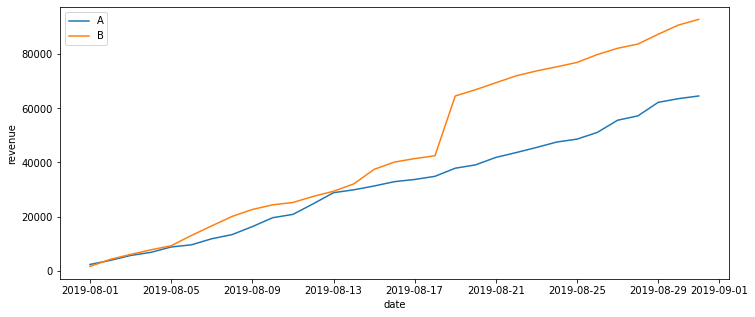

In [40]:
plt.figure(figsize = (12,5))
plt.plot(cum_revenue_a['date'], cum_revenue_a['revenue'], label='A')
plt.plot(cum_revenue_b['date'], cum_revenue_b['revenue'], label='B')

plt.xlabel('date')
plt.ylabel('revenue')

plt.legend()

Dari visualisasi data di atas, kita dapat melihat bahwa pendapatan terus meningkat dari awal bulan hingga akhir bulan Agustus 2019, yang merupakan pertanda baik.

Namun demikian, kelompok B sepertinya mencatatkan lonjakan pendapatan pada titik-titik tertentu, terutama di pertengahan bulan. Hal ini mungkin menandakan adanya lonjakan jumlah pesanan atau adanya pesanan yang sangat mahal dalam sampel. Kita perlu menghapus data yang tidak normal tersebut sebelum melakukan analisis akhir.

Sementara itu, pendapatan kelompok A sepertinya lebih stabil dan tidak terlihat adanya lonjakan yang signifikan.

### Ukuran Pesanan Rata-rata Kumulatif Berdasarkan Kelompok

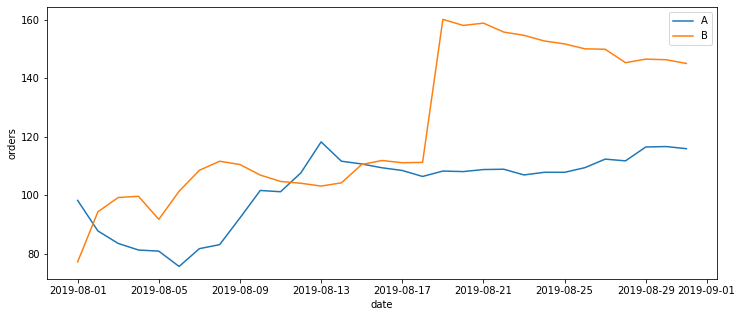

In [41]:
plt.figure(figsize = (12,5))
plt.plot(cum_revenue_a['date'], cum_revenue_a['revenue']/cum_revenue_a['orders'], label='A')
plt.plot(cum_revenue_b['date'], cum_revenue_b['revenue']/cum_revenue_b['orders'], label='B')

plt.xlabel('date')
plt.ylabel('orders')

plt.legend() 

Dari grafik di atas, dapat dilihat sepertinya jumlah pesanan mengalami peningkatan pada kelompok B, meskipun sempat terjadi penurunan di awal bulan, namun terdapat juga lonjakan kenaikan yang tajam di sekitar pertengahan Agustus 2019. Sepertinya, jumlah pesanan yang besar terdapat di sekitar waktu ini.

Namun, untuk kelompok A, terjadi penurunan jumlah pesanan di awal bulan, sebelum akhirnya mulai naik kembali hingga cukup stabil di sekitar pertengahan bulan Agustus 2019.

Meskipun demikian, dapat kita lihat bahwa nilai kumulatif jumlah pesanan rata-rata di kedua kelompok masih berfluktuasi, sehingga kita tidak dapat menarik kesimpulan secara langsung berdasarkan metrik ini.

Mungkin untuk langkah selanjutnya, kita perlu untuk menganalisis *outlier* yang terdapat pada data kita.

### Perbedaan Relatif Ukuran Pesanan Rata-rata Kumulatif 

Kita akan melihat perbedaan relatif ukuran pesanan rata-rata kumulatif kelompok B yang dibandingkan dengan kelompok A.

In [42]:
merged_cum_revenue = cum_revenue_a.merge(cum_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

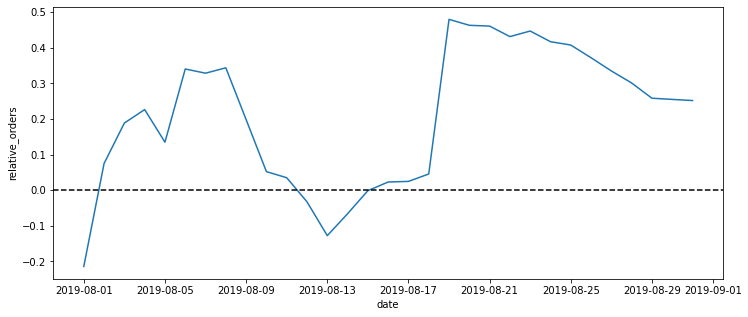

In [43]:
plt.figure(figsize = (12,5))
plt.plot(merged_cum_revenue['date'], (merged_cum_revenue['revenueB']/merged_cum_revenue['ordersB'])/
         (merged_cum_revenue['revenueA']/merged_cum_revenue['ordersA'])-1,
        ) 

plt.xlabel('date')
plt.ylabel('relative_orders')

plt.axhline(y=0, color='black', linestyle='--')          


Berdasarkan grafik visualisasi di atas, dapat kita perhatikan di awal bulan terdapat nilai minus, yang dapat diartikan bahwa pembelian rata-rata kelompok B awalnya lebih rendah dibanding pembelian rata-rata kelompok A. 

Terdapat peningkatan nilai pada minggu pertama dimana perbedaan relatifnya positif , namun mulai menurun kembali di minggu kedua dan ketiga, hingga pembelian rata-rata kelompok B mengalami lonjakan peningkatan sejak pertengahan bulan Agustus 2019 dibandingkan kelompok A, dan kemudian lebih stabil.

Sepertinya, melihat dari grafik di atas, perubahan yang dilakukan pada website atau aplikasi toko daring direspon secara cukup fluktuatif di kelompok B. 

### Tingkat Konversi Setiap Kelompok

In [44]:
cum_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [45]:
cum_data['conversion'] = cum_data['orders'] / cum_data['visitors'] * 100
cum_data

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,3.337969
1,2019-08-01,B,21,20,1620.0,713,2.945302
2,2019-08-02,A,44,38,3860.3,1338,3.288490
3,2019-08-02,B,45,43,4243.8,1294,3.477589
4,2019-08-03,A,68,62,5675.5,1845,3.685637
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708,3.365710
58,2019-08-30,A,545,493,63563.5,18037,3.021567
59,2019-08-30,B,620,567,90736.3,18198,3.406968
60,2019-08-31,A,557,503,64554.9,18736,2.972886


In [46]:
cum_data_a = cum_data[cum_data['group']=='A']
cum_data_b = cum_data[cum_data['group']=='B']

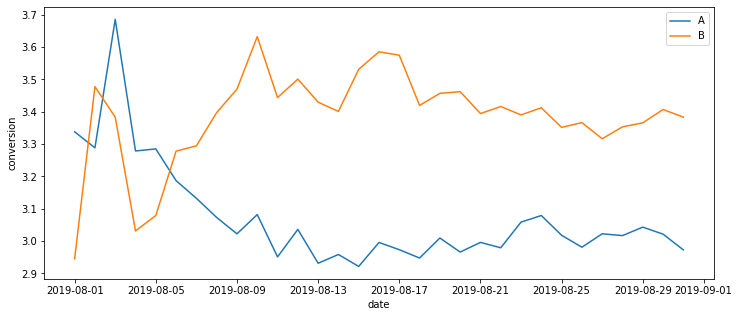

In [47]:
plt.figure(figsize = (12,5))
plt.plot(cum_data_a['date'], cum_data_a['conversion'], label='A')
plt.plot(cum_data_b['date'], cum_data_b['conversion'], label='B')

plt.xlabel('date')
plt.ylabel('conversion')

plt.legend()

Berdasarkan grafik visualisasi di atas, dapat kita lihat bahwa nilai untuk kedua kelompok masih sangat berfluktuasi di sekitar nilai 0.029 hingga 0.037.
Pada awalnya, kelompok A memiliki tingkat konversi yang lebih tinggi daripada kelompok B. Namun, seiring berjalannya waktu, tingkat konversi kelompok B mulai naik di sekitar minggu kedua Agustus, sementara pada saat yang hampir sama, tingkat konversi kelompok A mulai menurun.

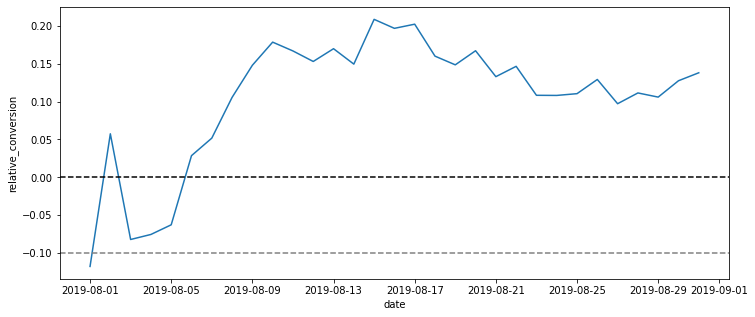

In [48]:
merged_cum_conversions = cum_data_a[['date','conversion']].merge(cum_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (12,5))
plt.plot(merged_cum_conversions['date'], merged_cum_conversions['conversionB']/merged_cum_conversions['conversionA']-1)

plt.xlabel('date')
plt.ylabel('relative_conversion')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')


Berdasarkan grafik perbedaan relatif untuk tingkat konversi kumulatif di atas, pada awal pengujian, kelompok B sempat tertinggal jauh, namun kemudian tingkat konversinya mengalami peningkatan. Kemudian, konversinya pun turun lagi, dan sekarang mengalami peningkatan secara bertahap meskipun belum stabil.

Hal ini menunjukkan bahwa kelompok B sepertinya lebih efektif dalam menghasilkan pesanan dari jumlah kunjungan yang sama dibandingkan dengan kelompok A. Tetapi, kita masih perlu mempertimbangkan adanya *outlier* pada data kita sebelum mengambil keputusan akhir.

### Jumlah Pesanan per Pengguna

In [49]:
df_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [50]:
df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [51]:
orders_by_users = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['visitor_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


In [52]:
orders_by_users['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

Text(0, 0.5, 'orders')

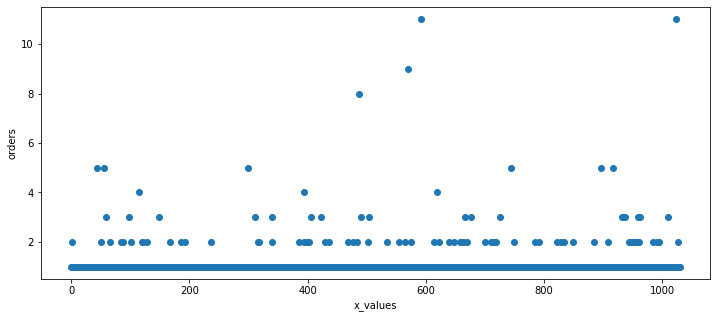

In [53]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize = (12,5))
plt.scatter(x_values, orders_by_users['orders'])

plt.xlabel('x_values')
plt.ylabel('orders')

Dari tabel dan grafik di atas, ternyata masing-masing pengguna rata-rata membuat 1 pesanan, sedangkan yang memiliki pesanan di atas 2, jumlahnya hanya sedikit. Namun, kita juga memiliki beberapa jumlah pesanan yang sangat besar, seperti 9 dan 11.

Untuk melihat apakah nilai-nilai tersebut wajar atau tidak, kita akan mencoba menghitung persentil ke-95 dan 99.

In [54]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Setelah kita hitung persentilnya, ternyata pengguna yang membuat lebih dari 2 pesanan tidak lebih dari 5%, dan hanya 1% yang membuat pesanan lebih dari 4 kali. Sehingga, dapat kita simpulkan bahwa 2 pesanan per pengguna, adalah batas bawah jumlah pesanan.

Dengan demikian, bisa dikatakan pesanan yang lebih dari 2 per pengguna (1-5% pesanan) adalah data anomali atau *outlier*.

### Harga Pesanan

In [55]:
df_orders.sort_values(by='revenue', ascending=False)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
858,192721366,1316129916,2019-08-27,1450.2,A
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
...,...,...,...,...,...
390,2415738512,2038680547,2019-08-25,5.2,A
414,2505918657,2524310328,2019-08-06,5.2,B
602,2356264591,1224903511,2019-08-09,5.1,A
404,2052514069,1995481842,2019-08-28,5.1,B


In [56]:
df_orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

Text(0, 0.5, 'revenue')

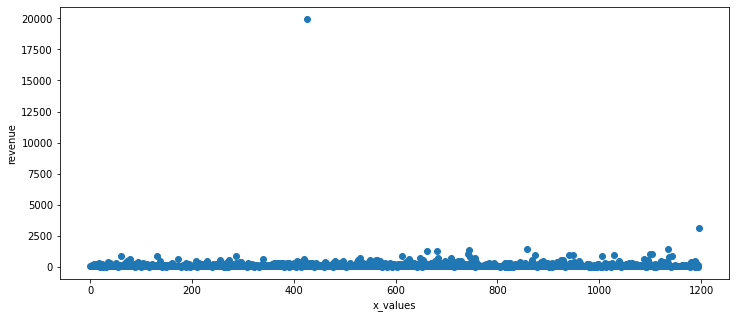

In [57]:
x_values = pd.Series(range(0, len(df_orders['revenue'])))

plt.figure(figsize = (12,5))
plt.scatter(x_values, df_orders['revenue'])

plt.xlabel('x_values')
plt.ylabel('revenue')

Text(0, 0.5, 'revenue')

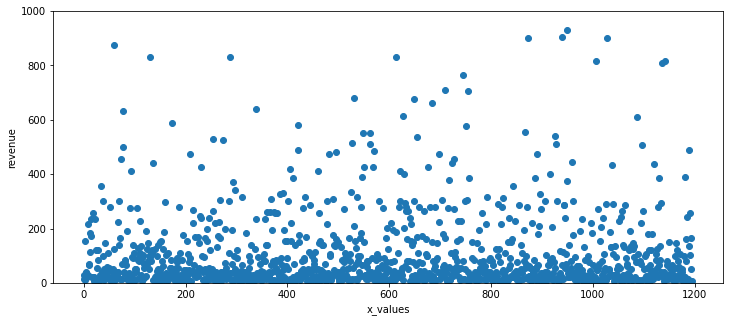

In [58]:
plt.figure(figsize = (12,5))
plt.scatter(x_values, df_orders['revenue'])

plt.ylim(0, 1000)

plt.xlabel('x_values')
plt.ylabel('revenue')

Berdasarkan tabel dan grafik di atas, kita bisa menetapkan limit untuk pesanan yang tidak normal, yakni antara $\$2500$ dan $\$20000$. Kita juga memiliki harga pesanan yang sangat tinggi, yaitu $19920. Harga pesanan ini kemungkinan adalah data anomali.

Untuk melihat apakah nilai-nilai tersebut wajar atau tidak, kita akan mencoba menghitung persentil ke-95 dan 99.

In [59]:
np.percentile(df_orders['revenue'], [95, 99])

array([435.54 , 900.904])

Setelah kita hitung persentilnya, ternyata persentase harga pesanan di atas $\$435$ tidak lebih dari 5\%, sedangkan harga di atas $\$900$ tidak lebih dari 1\%. Sehingga, dapat kita simpulkan bahwa $435 adalah batas bawah harga pesanan.

Dengan demikian, bisa dikatakan harga pesanan yang lebih dari $435 (1-5\% pesanan) adalah data anomali atau *outlier*.

### Signifikansi Statistik

#### Perbedaan Konversi Antar Kelompok

Kita akan menghitung signifikansi statistik dari perbedaan tingkat konversi antar kelompok dengan menggunakan data sebelum penghapusan anomali.

Untuk menghitung signifikansi statistik tersebut, kita akan menerapkan pengujian Mann-Whitney dengan nilai alpha adalah 5% atau 0.05. Selain itu, kita akan menentukan 2 hipotesis, yaitu :

H0 : tingkat konversi antar kelompok sama

H1 : tingkat konversi antar kelompok berbeda

In [60]:
df_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [61]:
df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [62]:
orders_by_users_a = df_orders[df_orders['group']=='A'].groupby('visitor_id', as_index=False).agg(
    {'transaction_id' : pd.Series.nunique})
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = df_orders[df_orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_b.columns = ['visitor_id', 'orders'] 

In [63]:
orders_by_users_a

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [64]:
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(
    0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(
        orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(
    0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(
        orders_by_users_b['orders'])), name='orders')],axis=0)

In [83]:
sample_a

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [65]:
alpha = 0.05
results = st.mannwhitneyu(sample_a, sample_b)
results.pvalue

0.016792355056752608

In [66]:
if (results.pvalue < alpha):
    print('Tolak null hipotesis')
else:
    print('Kita gagal menolak null hipotesis')

Tolak null hipotesis


In [67]:
sample_b.mean()/sample_a.mean()-1

0.13807884655320146

Setelah kita menghitung signifikansi statistik dari perbedaan tingkat konversi antar kelompok dengan menerapkan kriteria statistik Mann-Whitney, ternyata terdapat perbedaan antara kelompok A dan kelompok B.

Nilai p jauh lebih rendah dibandingkan nilai alpha (0.05), sehingga kita menolak hipotesis nol, dimana hipotesis nol adalah **tingkat konversi antar kelompok sama**. Analisis yang kita lakukan terhadap data mentah (data sebelum penghapusan anomali) menunjukkan bahwa tingkat konversi kelompok memiliki perbedaan yang signifikan secara statistik.

Perolehan konversi relatif untuk kelompok B jika dibandingkan dengan kelompok A adalah 13.8%.

#### Perbedaan Ukuran Pesanan Rata-rata Antar Kelompok

Kita akan menghitung signifikansi statistik dari perbedaan ukuran pesanan rata-rata antar kelompok dengan menggunakan data mentah, yaitu data sebelum penghapusan anomali.

Untuk menghitung signifikansi statistik tersebut, kita akan menerapkan pengujian Mann-Whitney dengan nilai alpha adalah 5% atau 0.05. Selain itu, kita akan menentukan 2 hipotesis, yaitu :

H0 : tidak terdapat perbedaan ukuran pesanan rata-rata anatara kelompok A dan kelompok B

H1 : terdapat perbedaan ukuran pesanan rata-rata anatara kelompok A dan kelompok B

In [68]:
alpha = 0.05
results = st.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])
results.pvalue

0.6915246773264736

In [69]:
if (results.pvalue < alpha):
    print('Tolak null hipotesis')
else:
    print('Kita gagal menolak null hipotesis')

Kita gagal menolak null hipotesis


In [70]:
df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1

0.25165300678182456

Setelah kita menghitung signifikansi statistik dari perbedaan ukuran pesanan rata-rata antar kelompok dengan menerapkan kriteria statistik Mann-Whitney, ternyata tidak terdapat perbedaan antara kelompok A dan kelompok B.

Nilai p jauh lebih tinggi dibandingkan nilai alpha (0.05), sehingga kita tidak dapat menolak hipotesis nol, dimana hipotesis nol adalah **tidak terdapat perbedaan ukuran pesanan rata-rata antara kelompok A dan kelompok B**. Analisis yang kita lakukan terhadap data mentah (data sebelum penghapusan anomali) menunjukkan bahwa ukuran pesanan rata-rata antar kelompok tidak memiliki perbedaan yang signifikan secara statistik.

Namun, ukuran pesanan rata-rata untuk kelompok B sepertinya jauh lebih besar daripada kelompok A, perbedaan relatifnya adalah 25%.

#### Perbedaan Konversi Antar Kelompok Menggunakan Data yang Telah Difilter

Selanjutnya, kita akan menghitung signifikansi statistik dari perbedaan tingkat konversi antar kelompok dengan menggunakan data yang telah difilter.

Sebelumnya, kita telah mengetahui bahwa terdapat 1-5% pengguna yang memiliki lebih dari 2 pesanan dan harga pesanannya lebih dari $435, dan kita sudah menentukan bahwa data tersebut adalah data anomali. Karena saat ini kita akan menggunakan data yang telah difilter, kita tidak akan menggunakan data anomali tersebut dan akan mengelompokkan pengguna ini sebagai pengguna yang tidak wajar.

Untuk menghitung signifikansi statistik, kita akan menerapkan pengujian Mann-Whitney dengan nilai alpha adalah 5\% atau 0.05. Selain itu, kita akan menentukan 2 hipotesis, yaitu :

H0 : tingkat konversi antar kelompok sama

H1 : tingkat konversi antar kelompok berbeda

In [71]:
users_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'], 
                               orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id']], axis = 0)

users_expensive_orders = df_orders[df_orders['revenue'] > 435]['visitor_id']

abnormal_users = pd.concat([users_many_orders, users_expensive_orders], axis = 0).drop_duplicates().sort_values()

In [72]:
abnormal_users.shape

(75,)

Secara total, kita memiliki 75 pengguna yang tidak wajar.

In [73]:
sample_a_filtered = pd.concat([orders_by_users_a[~(orders_by_users_a['visitor_id'].isin(abnormal_users))]['orders'],
                               pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(
                                   orders_by_users_a['orders'])),name='orders')],axis=0)

sample_b_filtered = pd.concat([orders_by_users_b[~(orders_by_users_b['visitor_id'].isin(abnormal_users))]['orders'],
                               pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(
                                   orders_by_users_b['orders'])),name='orders')],axis=0)

In [74]:
alpha = 0.05
results = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)
results.pvalue

0.01417823754717904

In [75]:
if (results.pvalue < alpha):
    print('Tolak null hipotesis')
else:
    print('Kita gagal menolak null hipotesis')

Tolak null hipotesis


In [76]:
sample_b_filtered.mean()/sample_a_filtered.mean()-1

0.17066895368782165

Analisis yang kita lakukan terhadap data yang telah difilter menunjukkan bahwa hasil konversinya mengalami perubahan, namun tidak signifikan. Sehingga, dapat dikatakan tetap ada perubahan tingkat konversi antara kedua kelompok.

Nilai p tetap jauh lebih rendah dibandingkan nilai alpha (0.05), sehingga kita menolak hipotesis nol, dimana hipotesis nol adalah **tingkat konversi antar kelompok sama**.

Perolehan konversi relatif untuk kelompok B jika dibandingkan dengan kelompok A saat ini adalah 17%, terdapat peningkatan jika dibandingkan dengan hasil saat kita menganalisa menggunakan data mentah, yaitu 13.8%.

#### Perbedaan Ukuran Pesanan Rata-rata Antar Kelompok Menggunakan Data yang Telah Difilter

Sebelumnya, kita telah mengetahui bahwa terdapat 1-5% pengguna yang memiliki lebih dari 2 pesanan dan harga pesanannya lebih dari $435, dan kita sudah menentukan bahwa data tersebut adalah data anomali dan dikelompokkan sebagai pengguna yang tidak wajar. Setelah dihitung, terdapat 75 pengguna yang tidak wajar. Karena saat ini kita akan menggunakan data yang telah difilter, kita tidak akan menggunakan data anomali tersebut.

Untuk menghitung signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok, kita akan menerapkan pengujian Mann-Whitney dengan nilai alpha adalah 5\% atau 0.05. Selain itu, kita akan menentukan 2 hipotesis, yaitu :

H0 : tidak terdapat perbedaan ukuran pesanan rata-rata anatara kelompok A dan kelompok B

H1 : terdapat perbedaan ukuran pesanan rata-rata anatara kelompok A dan kelompok B

In [77]:
orders_a_filtered = (df_orders[np.logical_and(df_orders['group']=='A',np.logical_not(
    df_orders['visitor_id'].isin(abnormal_users)))]['revenue'])

orders_b_filtered = (df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(
    df_orders['visitor_id'].isin(abnormal_users)))]['revenue'])

In [78]:
alpha = 0.05
results = st.mannwhitneyu(orders_a_filtered, orders_b_filtered)
results.pvalue

0.7500191790687051

In [79]:
if (results.pvalue < alpha):
    print('Tolak null hipotesis')
else:
    print('Kita gagal menolak null hipotesis')

Kita gagal menolak null hipotesis


In [80]:
orders_b_filtered.mean() / orders_a_filtered.mean() - 1

-0.026950488172385878

Analisis yang kita lakukan terhadap data yang telah difilter menunjukkan bahwa hasilnya mengalami perubahan, yaitu nilai p meningkat dan perbedaan relatifnya menurun.

Nilai p tetap lebih tinggi dibandingkan nilai alpha (0.05), sehingga kita tidak dapat menolak hipotesis nol, dimana hipotesis nol adalah **tidak terdapat perbedaan ukuran pesanan rata-rata antara kelompok A dan kelompok B**.

Namun, meskipun nilai p tidak mengalami perubahan yang signifikan, ternyata ukuran perbedaan pesanan rata-rata kelompok B mengalami perubahan drastis dibandingkan dengan hasil pada data mentah. Pada data mentah, perbedaan relatifnya sebesar 25%, namun pada data yang telah difilter, ukuran pesanan rata-rata untuk kelompok B jauh lebih kecil daripada kelompok A, dengan perbedaan relatifnya sekitar 2.6%.

### Kesimpulan Analisa A/B Testing

Kita telah mencoba melakukan analisa A/B testing, dan dapat disimpulkan bahwa:

1. Baik data mentah maupun data yang telah difilter, keduanya menunjukkan ada perbedaan yang signifikan secara statistik dalam hal konversi antar kelompok. Tingkat konversi relatif pada data mentah adalah 13.8% dan pada data yang telah difilter menjadi 17%.

2. Baik data mentah maupun data yang telah difilter, keduanya tidak menunjukkan perbedaan yang signifikan secara statistik dalam hal ukuran pesanan rata-rata antar kelompok. Namun, perbedaan relatif ukuran pesanan antar kelompok mengalami perubahan, dari awalnya 0.25 pada data mentah, menjadi -0.026 pada data yang telah difilter.

3. Meskipun perbedaan relatifnya mengalami perubahan menjadi -0.026, namun signifikansi statistik menunjukkan bahwa tidak ada perbedaan yang signifikan antara kelompok A dan B dalam hal ukuran pesanan rata-rata, maka dapat disimpulkan bahwa perbedaan tersebut tidak dapat dianggap secara signifikan atau tidak dapat dianggap sebagai perbedaan yang lebih kecil atau lebih besar antara kelompok A dan B.
Dalam hal ini, perbedaan relatif -0.026 mungkin hanya merupakan fluktuasi dalam data yang tidak cukup signifikan untuk menyimpulkan adanya perbedaan yang nyata antara kelompok A dan B dalam hal ukuran pesanan rata-rata.

Grafik yang menunjukkan perbedaan konversi antar kelompok menunjukkan bahwa hasil kelompok B lebih baik, dan memperlihatkan peningkatan secara signifikan:

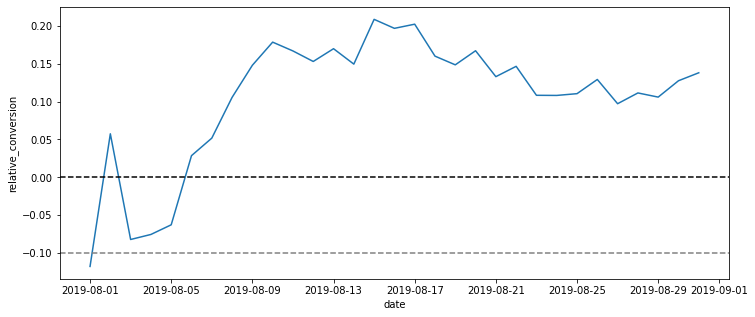

In [81]:
merged_cum_conversions = cum_data_a[['date','conversion']].merge(cum_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize = (12,5))
plt.plot(merged_cum_conversions['date'], merged_cum_conversions['conversionB']/merged_cum_conversions['conversionA']-1)

plt.xlabel('date')
plt.ylabel('relative_conversion')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')


Grafik yang menunjukkan perbedaan ukuran pesanan rata-rata antar kelompok menunjukkan bahwa hasil kelompok B berfluktuasi. Awalnya meningkat, kemudian menurun, dan terakhir meningkat kembali:

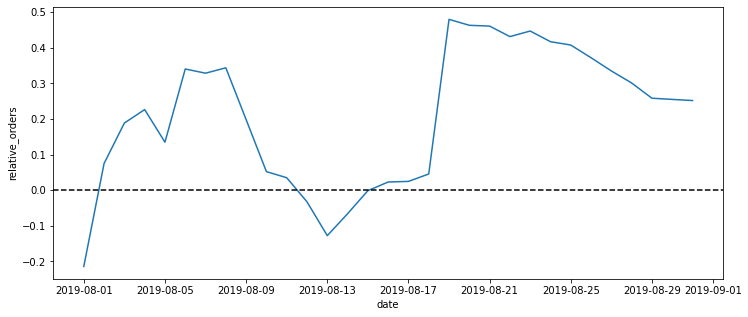

In [82]:
plt.figure(figsize = (12,5))
plt.plot(merged_cum_revenue['date'], (merged_cum_revenue['revenueB']/merged_cum_revenue['ordersB'])/
         (merged_cum_revenue['revenueA']/merged_cum_revenue['ordersA'])-1,
        ) 

plt.xlabel('date')
plt.ylabel('relative_orders')

plt.axhline(y=0, color='black', linestyle='--')          


Berdasarkan hasil pengujian, dapat disimpulkan bahwa kelompok B menunjukkan peningkatan yang signifikan dalam hal tingkat konversi, tetapi tidak ada perubahan yang signifikan dalam hal ukuran pesanan rata-rata. Sehingga, akan lebih baik untuk melanjutkan pengujian karena terdapat perbedaan yang signifikan dalam tingkat konversi antara kedua kelompok.

## Kesimpulan Umum

Kita telah mencoba untuk mengolah dan melakukan analisa data serta melakukan analisa A/B testing.

Kumpulan data yang kita miliki terbagi dalam 3 dataset, yaitu:

1. Data mengenai hipotesis disimpan pada file `/datasets/hypotheses_us.csv`
2. Data mengenai pemesanan disimpan pada file `/datasets/orders_us.csv`
3. Data mengenai kunjungan disimpan pada file `/datasets/visits_us.csv` 

Data mengenai hipotesis digunakan pada tahap pertama proyek, sedangkan data mengenai pemesanan dan kunjungan digunakan pada tahap kedua.

Dari tahap pra-pemrosesan data, kita telah mendapatkan kesimpulan:

1. Terdapat kesalahan pada gaya penulisan dan tipe data di beberapa kolom pada tabel yang kita miliki. Kesalahan - kesalahan tersebut sudah diperbaiki. Masing - masing kolom dan tabel tersebut adalah:
    * Semua kolom pada tabel `hypotheses` sudah diperbaiki gaya penulisannya dengan menggunakan huruf kecil.
    * Kedua kolom pada tabel `orders` sudah diperbaiki gaya penulisannya menggunakan huruf kecil dan nama kolom yang terdiri dari dua kata sudah menggunakan underscore.
    * kolom `date` pada tabel `orders` sudah diperbaiki tipe datanya.
    * kolom `date` pada tabel `visits` sudah diperbaiki tipe datanya.       

2. Tidak terdapat nilai yang hilang dan data duplikat pada ketiga dataset yang kita miliki.

Setelah kita memperbaiki masalah yang terdapat pada dataset, selanjutnya kita melakukan pemrioritasan hipotesis, yaitu dengan menentukan hipotesis mana yang perlu diuji dan hipotesis mana yang harus disingkirkan dan dilanjutkan dengan melakukan analisis *A/B Testing*. Kita mencoba memprioritaskan hipotesis melalui metode **ICE** dan **RICE**, dan mendapat kesimpulan:

1. Kedua metode tersebut memberikan 2 hasil yang berbeda.
    * Ketika menjalankan metode **ICE** kita mendapatkan hipotesis 8, yaitu, membuat promosi untuk memberikan diskon kepada pengguna yang berulang tahun adalah yang paling layak diuji. Pada metode ini, kita hanya mempertimbangkan 3 hal yaitu dampak, keyakinan, dan usaha, sehingga hipotesis 8 yang memiliki nilai tertinggi pada ketiga komponen tersebut adalah yang paling menjanjikan.

    * Sedangkan, ketika menggunakan metode **RICE** kita mendapatkan hasil bahwa hipotesis 7, yaitu, menambahkan formulir berlangganan di semua halaman utama untuk membantu kita menyusun *email* para pengguna adalah hipotesis yang paling layak diuji. Pada metode ini, selain ketiga komponen yang ada (dampak, keyakinan dan usaha) terdapat komponen *reach* dimana kita juga mempertimbangkan jumlah pengguna yang dapat dijangkau, maka hipotesis 7 yang memiliki nilai *reach* tertinggi adalah yang paling berpotensi diuji.

2. Melihat nilai komponen pada kedua hipotesis tersebut, sebenarnya keduanya sama-sama layak untuk diuji.

    * Dari segi *effort* kedua hipotesis memiliki nilai yang sama, sehingga jelas usaha yang dilakukan untuk menjalankan kedua hipotesis sama besarnya.
    * Dari segi *impact* dan *confidence* jelas hipotesis 8 lebih unggul, karena pengguna akan lebih tertarik apabila diberikan promosi diskon meskipun hanya 1 kali dalam setahun (hanya pada tanggal ulang tahun pengguna) dibandingkan hanya sekedar berlangganan saja (subscription).
    * Dari segi *reach* hipotesis 7 akan lebih unggul, karena dengan nilai *reach* yang tinggi, berarti menambahkan formulir berlangganan ini akan menjangkau sebagian besar pengguna dan banyak di antaranya menggunakan opsi tersebut, sehingga tingkat jangkauannya pun tinggi. Para pengguna mungkin akan lebih tertarik jika hanya perlu mendaftarkan email mereka untuk berlangganan dan masih bisa mendapatkan info mengenai promosi perusahaan, tanpa perlu membagikan data dirinya.
    
3. Setelah mempertimbangkan segala segi pada kedua metode, diputuskan untuk menggunakan hipotesis 7 pada pengujian selanjutnya.

Tahapan selanjutnya, kita telah melakukan A/B testing dan mendapatkan hasil seperti yang dideskripsikan dalam file `orders_us.csv` dan `visits_us.csv`. 

Kelompok A adalah kelompok kontrol, dimana tidak terdapat perubahan pada website atau aplikasi toko daring.
Kelompok B adalah kelompok uji, dimana para pengguna menggunakan website atau aplikasi toko daring yang sudah mengalami perubahan. 

Kemudian kita melakukan analisa dengan melalui beberapa langkah, yaitu:

1. Menghitung pendapatan kumulatif berdasarkan kelompok, dan mendapatkan kesimpulan:

    * Pendapatan terus meningkat dari awal bulan hingga akhir bulan Agustus 2019. Untuk kelompok B, terdapat lonjakan pendapatan pada titik-titik tertentu terutama di pertengahan bulan, sementara itu, pendapatan kelompok A sepertinya lebih stabil dan tidak terlihat adanya lonjakan yang signifikan.
    
2. Menghitung ukuran pesanan rata-rata kumulatif berdasarkan kelompok, dan mendapatkan kesimpulan:

    * Jumlah pesanan mengalami peningkatan pada kelompok B, meskipun sempat terjadi penurunan di awal bulan, namun terdapat juga lonjakan kenaikan yang tajam di sekitar pertengahan Agustus 2019. Sepertinya, jumlah pesanan yang besar terdapat di sekitar waktu ini.
    * Untuk kelompok A, terjadi penurunan jumlah pesanan di awal bulan, sebelum akhirnya mulai naik kembali hingga cukup stabil di sekitar pertengahan bulan Agustus 2019.
    * Nilai kumulatif jumlah pesanan rata-rata di kedua kelompok masih berfluktuasi, sehingga kita belum bisa menarik kesimpulan secara langsung berdasarkan metrik ini.
    
3. Menghitung perbedaan relatif ukuran pesanan rata-rata kumulatif, dan mendapatkan kesimpulan:

    * Di awal bulan terdapat nilai minus, yang dapat diartikan bahwa pembelian rata-rata kelompok B awalnya lebih rendah dibanding pembelian rata-rata kelompok A. 
    * Terdapat peningkatan nilai pada minggu pertama dimana perbedaan relatifnya positif , namun mulai menurun kembali di minggu kedua dan ketiga, hingga pembelian rata-rata kelompok B mengalami lonjakan peningkatan sejak pertengahan bulan Agustus 2019 dibandingkan kelompok A, dan kemudian lebih stabil.
    * Sepertinya, perubahan yang dilakukan pada website atau aplikasi toko daring direspon secara cukup fluktuatif di kelompok B.
    
4. Menghitung tingkat konversi setiap kelompok, dan mendapatkan kesimpulan:

    * Nilai untuk kedua kelompok masih sangat berfluktuasi di sekitar nilai 0.029 hingga 0.037.
    * Pada awalnya, kelompok A memiliki tingkat konversi yang lebih tinggi daripada kelompok B. Namun, seiring berjalannya waktu, tingkat konversi kelompok B mulai naik di sekitar minggu kedua Agustus, sementara pada saat yang hampir sama, tingkat konversi kelompok A mulai menurun.
    * Berdasarkan grafik perbedaan relatif untuk tingkat konversi kumulatif di atas, pada awal pengujian, kelompok B sempat tertinggal jauh, namun kemudian tingkat konversinya mengalami peningkatan. Kemudian, konversinya pun turun lagi, dan sekarang mengalami peningkatan secara bertahap meskipun belum stabil. Hal ini menunjukkan bahwa kelompok B sepertinya lebih efektif dalam menghasilkan pesanan dari jumlah kunjungan yang sama dibandingkan dengan kelompok A.
    
5. Menghitung jumlah pesanan per pengguna dan harga pesanan, dan mendapatkan kesimpulan:

    * Masing-masing pengguna rata-rata membuat 1 pesanan, sedangkan yang memiliki pesanan di atas 2, jumlahnya hanya sedikit.
    * Setelah kita menghitung persentil ke-95 dan 99, ternyata pengguna yang membuat lebih dari 2 pesanan tidak lebih dari 5%, dan hanya 1% yang membuat pesanan lebih dari 4 kali. Sehingga, dapat kita simpulkan bahwa pesanan yang lebih dari 2 per pengguna (1-5% pesanan) adalah data anomali atau *outlier*.
    * Limit untuk pesanan yang tidak normal, yakni antara $\$2500$ dan $\$20000$. Kita juga memiliki harga pesanan yang sangat tinggi, yaitu $\$19920$.
    * Setelah kita hitung persentil ke-95 dan 99, ternyata persentase harga pesanan di atas $\$435$ tidak lebih dari 5\%, sedangkan harga di atas $\$900$ tidak lebih dari 1\%. Sehingga, bisa dikatakan harga pesanan yang lebih dari $435 (1-5\% pesanan) adalah data anomali atau *outlier*.

6. Menghitung signifikansi statistik masing-masing untuk perbedaan tingkat konversi antar kelompok dan juga perbedaan ukuran pesanan rata-rata antar kelompok dengan menggunakan data mentah (data dengan anomali) dan data yang telah difilter (data tanpa anomali atau *outlier*). Kita melakukan pengujian Mann-Whitney dengan nilai alpha adalah 5%.
Dari penghitungan ini, didapat kesimpulan:

    * Baik data mentah maupun data yang telah difilter, keduanya menunjukkan ada perbedaan yang signifikan secara statistik dalam hal konversi antar kelompok. Tingkat konversi relatif pada data mentah adalah 13.8% dan pada data yang telah difilter menjadi 17%.
    * Baik data mentah maupun data yang telah difilter, keduanya tidak menunjukkan perbedaan yang signifikan secara statistik dalam hal ukuran pesanan rata-rata antar kelompok. Namun, perbedaan relatif ukuran pesanan antar kelompok mengalami perubahan, dari awalnya 0.25 pada data mentah, menjadi -0.026 pada data yang telah difilter.
    * Meskipun perbedaan relatifnya mengalami perubahan menjadi -0.026, namun signifikansi statistik menunjukkan bahwa tidak ada perbedaan yang signifikan antara kelompok A dan B dalam hal ukuran pesanan rata-rata, maka dapat disimpulkan bahwa perbedaan relatif -0.026 mungkin hanya merupakan fluktuasi dalam data yang tidak cukup signifikan untuk menyimpulkan adanya perbedaan yang nyata antara kelompok A dan B dalam hal ukuran pesanan rata-rata.
    * Kelompok B menunjukkan peningkatan yang signifikan dalam hal tingkat konversi, tetapi tidak ada perubahan yang signifikan dalam hal ukuran pesanan rata-rata, sehingga sebaiknya pengujian tetap dilanjutkan untuk meninjau lebih jauh bagaimana perubahan yang dilakukan dapat memberikan peningkatan pada tingkat konversi namun tidak pada ukuran pesanan.
    

Dengan demikian, dapat disimpulkan jika tim pemasaran ingin meningkatkan pendapatan perusahaan, maka mereka dapat melanjutkan pengujian terhadap hipotesis 7, yaitu menambahkan formulir berlangganan di semua halaman utama untuk membantu menyusun *email* para pengguna. Karena, meskipun hasil pengujian analisa *A/B Testing* menunjukkan bahwa tidak terjadi perubahan signifikan dalam hal ukuran pesanan, namun terjadi perubahan yang signifikan dalam hal tingkat konversi antara kedua kelompok, yang tetap dapat memberikan indikasi potensi peningkatan pendapatan. 

Tingkat konversi adalah salah satu indikator penting dalam mengukur keberhasilan strategi pemasaran, sehingga perubahan signifikan pada tingkat konversi kemungkinan besar merupakan pertanda baik bahwa perubahan yang kita lakukan cukup berhasil. Pengujian lebih lanjut dapat membantu mengidentifikasi faktor-faktor lain yang mungkin berguna untuk mengoptimalkan pendapatan perusahaan.